## Imports

In [35]:
# data manipulation
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.decomposition import PCA

# regular expressions
import re

## Reading the dataset

In [2]:
# Reading the dataset
df = pd.read_csv('data/covtype.data', header=None)

In [3]:
# visualizing the first 10 instances
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


Since the covtype.data file only has the instances values, we need to extract the column names of the covtype.info file.

### Adding columns names

In [4]:
with open('data/covtype.info', 'r') as file:
    info = file.read()

print(info)

The Forest CoverType dataset


1.	Title of Database:

	Forest Covertype data


2.	Sources:

	(a) Original owners of database:
		Remote Sensing and GIS Program
		Department of Forest Sciences
		College of Natural Resources
		Colorado State University
		Fort Collins, CO  80523
		(contact Jock A. Blackard, jblackard 'at' fs.fed.us
		      or Dr. Denis J. Dean, denis.dean 'at' utdallas.edu)

	NOTE:	Reuse of this database is unlimited with retention of 
		copyright notice for Jock A. Blackard and Colorado 
		State University.

	(b) Donors of database:
		Jock A. Blackard (jblackard 'at' fs.fed.us)
		GIS Coordinator
		USFS - Forest Inventory & Analysis
		Rocky Mountain Research Station
		507 25th Street
		Ogden, UT 84401

		Dr. Denis J. Dean (denis.dean 'at' utdallas.edu)
		Professor
		Program in Geography and Geospatial Sciences
		School of Economic, Political and Policy Sciences
		800 West Campbell Rd
		Richardson, TX  75080-3021 
		
		Dr. Charles W. Anderson (anderson 'at' cs.colostate.edu

In [5]:
column_names = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
]

In [6]:
for i in range(1, 5):
    column_names.append(f'Wilderness_Area_{i}')

In [7]:
for i in range(1, 41):
    column_names.append(f'Soil_Type_{i}')

In [8]:
column_names.append('Cover_Type')

We have 55 column names, matching the dimension of the data we've imported. Now, we just need to add them to the dataframe.

In [9]:
column_names, len(column_names)

(['Elevation',
  'Aspect',
  'Slope',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Horizontal_Distance_To_Roadways',
  'Hillshade_9am',
  'Hillshade_Noon',
  'Hillshade_3pm',
  'Horizontal_Distance_To_Fire_Points',
  'Wilderness_Area_1',
  'Wilderness_Area_2',
  'Wilderness_Area_3',
  'Wilderness_Area_4',
  'Soil_Type_1',
  'Soil_Type_2',
  'Soil_Type_3',
  'Soil_Type_4',
  'Soil_Type_5',
  'Soil_Type_6',
  'Soil_Type_7',
  'Soil_Type_8',
  'Soil_Type_9',
  'Soil_Type_10',
  'Soil_Type_11',
  'Soil_Type_12',
  'Soil_Type_13',
  'Soil_Type_14',
  'Soil_Type_15',
  'Soil_Type_16',
  'Soil_Type_17',
  'Soil_Type_18',
  'Soil_Type_19',
  'Soil_Type_20',
  'Soil_Type_21',
  'Soil_Type_22',
  'Soil_Type_23',
  'Soil_Type_24',
  'Soil_Type_25',
  'Soil_Type_26',
  'Soil_Type_27',
  'Soil_Type_28',
  'Soil_Type_29',
  'Soil_Type_30',
  'Soil_Type_31',
  'Soil_Type_32',
  'Soil_Type_33',
  'Soil_Type_34',
  'Soil_Type_35',
  'Soil_Type_36',
  'Soil_Type_37',
  'S

In [10]:
# assigning the dataframe column names to the list we've created
df.columns = column_names

In [11]:
# visualizing the dataset with the column names
df.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


## Data exploration

In [12]:
# a list with tasks to be performed in the preprocessing stage
todo_preprocessing = []

### Exploring dataset structure

Since we have a lot of columns with numbers in their titles, what makes it difficult for understand what they stand for, lets create a dictionary for a quick reference.

In [13]:
wilderness_area = {
    1: 'Rawah Wilderness Area',
    2: 'Neota Wilderness Area',
    3: 'Comanche Peak Wilderness Area',
    4: 'Cache la Poudre Wilderness Area',
}

#### Using regular expressions to extract the data from the following text:

In [14]:
text = """1	   2702		Cathedral family - Rock outcrop complex, extremely stony.
2	   2703		Vanet - Ratake families complex, very stony.
3	   2704		Haploborolis - Rock outcrop complex, rubbly.
4	   2705		Ratake family - Rock outcrop complex, rubbly.
5	   2706		Vanet family - Rock outcrop complex complex, rubbly.
6	   2717		Vanet - Wetmore families - Rock outcrop complex, stony.
7	   3501		Gothic family.
8	   3502		Supervisor - Limber families complex.
9	   4201		Troutville family, very stony.
10	   4703		Bullwark - Catamount families - Rock outcrop complex, rubbly.
11	   4704		Bullwark - Catamount families - Rock land complex, rubbly.
12	   4744		Legault family - Rock land complex, stony.
13	   4758		Catamount family - Rock land - Bullwark family complex, rubbly.
14	   5101		Pachic Argiborolis - Aquolis complex.
15	   5151		unspecified in the USFS Soil and ELU Survey.
16	   6101		Cryaquolis - Cryoborolis complex.
17	   6102		Gateview family - Cryaquolis complex.
18	   6731		Rogert family, very stony.
19	   7101		Typic Cryaquolis - Borohemists complex.
20	   7102		Typic Cryaquepts - Typic Cryaquolls complex.
21	   7103		Typic Cryaquolls - Leighcan family, till substratum complex.
22	   7201		Leighcan family, till substratum, extremely bouldery.
23	   7202		Leighcan family, till substratum - Typic Cryaquolls complex.
24	   7700		Leighcan family, extremely stony.
25	   7701		Leighcan family, warm, extremely stony.
26	   7702		Granile - Catamount families complex, very stony.
27	   7709		Leighcan family, warm - Rock outcrop complex, extremely stony.
28	   7710		Leighcan family - Rock outcrop complex, extremely stony.
29	   7745		Como - Legault families complex, extremely stony.
30	   7746		Como family - Rock land - Legault family complex, extremely stony.
31	   7755		Leighcan - Catamount families complex, extremely stony.
32	   7756		Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33	   7757		Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34	   7790		Cryorthents - Rock land complex, extremely stony.
35	   8703		Cryumbrepts - Rock outcrop - Cryaquepts complex.
36	   8707		Bross family - Rock land - Cryumbrepts complex, extremely stony.
37	   8708		Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38	   8771		Leighcan - Moran families - Cryaquolls complex, extremely stony.
39	   8772		Moran family - Cryorthents - Leighcan family complex, extremely stony.
40	   8776		Moran family - Cryorthents - Rock land complex, extremely stony."""

In [15]:
pattern = r'\d+\s{4}\d{4}\s{2}(.+)'

In [16]:
soil_type_discriptions = re.findall(pattern, text)

In [17]:
soil_types = {}
for i in range(1, 41):
    soil_types[i] = soil_type_discriptions[i-1]

In [18]:
soil_types

{1: 'Cathedral family - Rock outcrop complex, extremely stony.',
 2: 'Vanet - Ratake families complex, very stony.',
 3: 'Haploborolis - Rock outcrop complex, rubbly.',
 4: 'Ratake family - Rock outcrop complex, rubbly.',
 5: 'Vanet family - Rock outcrop complex complex, rubbly.',
 6: 'Vanet - Wetmore families - Rock outcrop complex, stony.',
 7: 'Gothic family.',
 8: 'Supervisor - Limber families complex.',
 9: 'Troutville family, very stony.',
 10: 'Bullwark - Catamount families - Rock outcrop complex, rubbly.',
 11: 'Bullwark - Catamount families - Rock land complex, rubbly.',
 12: 'Legault family - Rock land complex, stony.',
 13: 'Catamount family - Rock land - Bullwark family complex, rubbly.',
 14: 'Pachic Argiborolis - Aquolis complex.',
 15: 'unspecified in the USFS Soil and ELU Survey.',
 16: 'Cryaquolis - Cryoborolis complex.',
 17: 'Gateview family - Cryaquolis complex.',
 18: 'Rogert family, very stony.',
 19: 'Typic Cryaquolis - Borohemists complex.',
 20: 'Typic Cryaquep

#### Understanding the structure

In [19]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Elevation,2596,2590,2804,2785,2595,2579,2606,2605,2617,2612
Aspect,51,56,139,155,45,132,45,49,45,59
Slope,3,2,9,18,2,6,7,4,9,10
Horizontal_Distance_To_Hydrology,258,212,268,242,153,300,270,234,240,247
Vertical_Distance_To_Hydrology,0,-6,65,118,-1,-15,5,7,56,11
Horizontal_Distance_To_Roadways,510,390,3180,3090,391,67,633,573,666,636
Hillshade_9am,221,220,234,238,220,230,222,222,223,228
Hillshade_Noon,232,235,238,238,234,237,225,230,221,219
Hillshade_3pm,148,151,135,122,150,140,138,144,133,124
Horizontal_Distance_To_Fire_Points,6279,6225,6121,6211,6172,6031,6256,6228,6244,6230


In [20]:
# missing data and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area_1                   581012 non-null  int64
 11  Wilderness_Area_2                   581012 non-null 

There's no missing data, and all the datatypes are integers.

In [21]:
# checking for duplicated data
df[df.duplicated()]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type


No duplicated rows.

#### Statistical summary

In [22]:
df.iloc[:, :10].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


#### Distributions

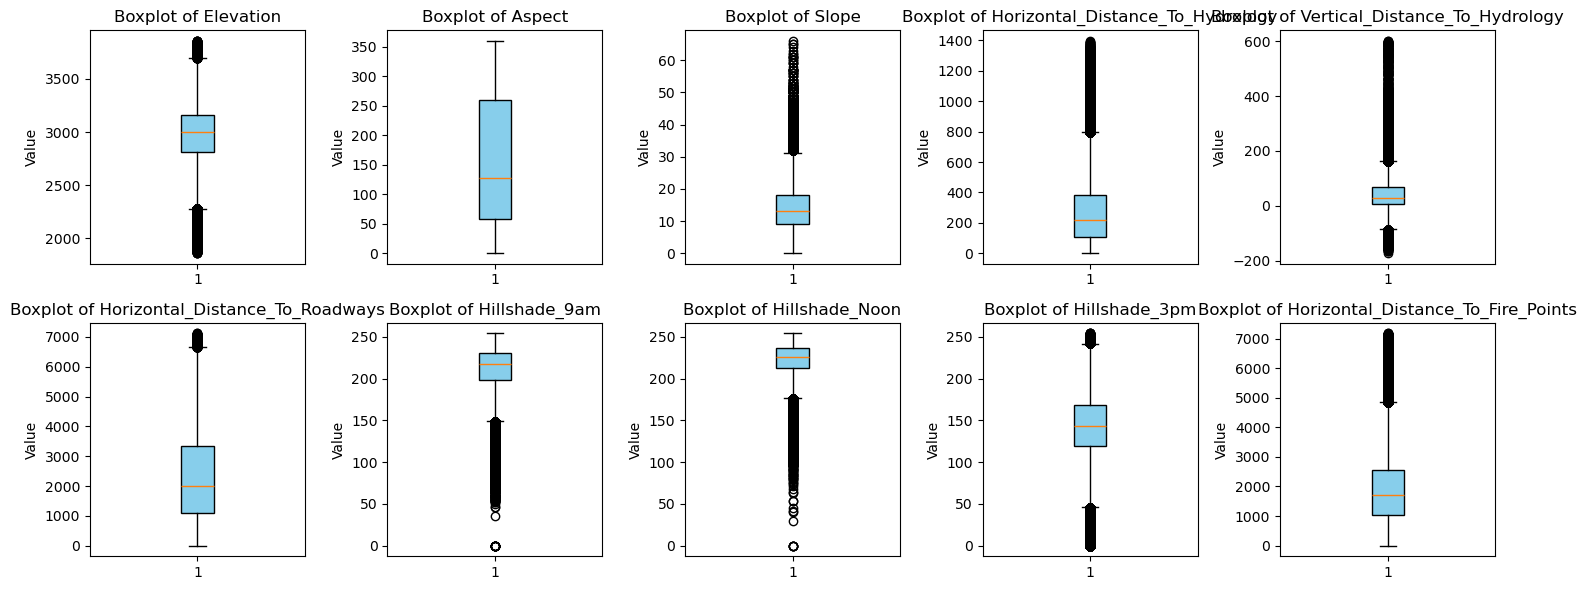

In [23]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i, col in enumerate(df.iloc[:, :10]):
    axes[i].boxplot(df[col], patch_artist=True,
                    boxprops=dict(facecolor='skyblue', color='black'),
                    whiskerprops=dict(color='black'),
                    capprops=dict(color='black'))
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

We can observe that the features have very different scales: The slope feature values range from 0 to 60, while horizontel distance to roadways goes from 0 up to 7000. Since some machine learning models are sensitive to different scales, let's add data scaling as a task for the preprocessing stage. Also, some features seems to have outliers, as indicated by the dots outside the boxplot's whiskers. If the models don't perform well in the first iteration, we can try to deal with the outliers to check if the model's metrics improve.

In [20]:
todo_preprocessing.append("Scale features")
todo_preprocessing.append("Deal with outliers (optional)")

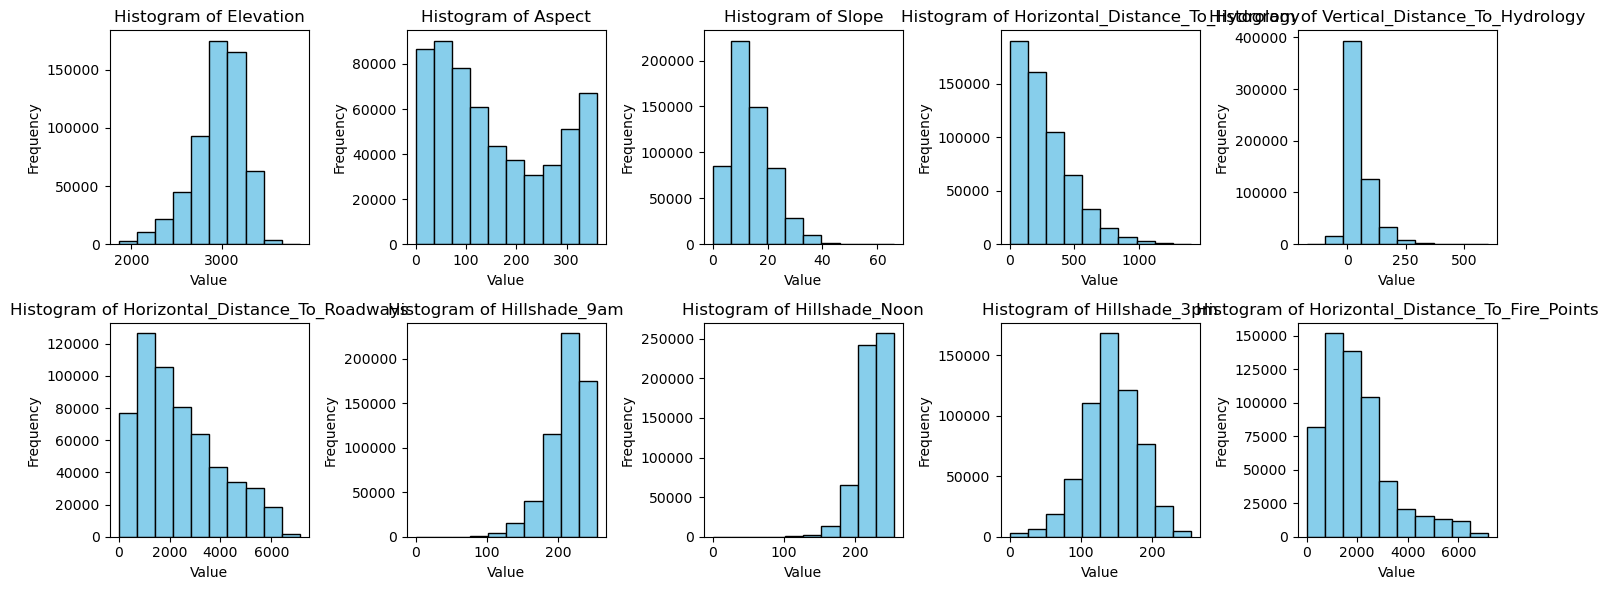

In [25]:
# 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten() # make it flat so it's easier to index

for i, col in enumerate(df.iloc[:, :10]):
    axes[i].hist(df[col], bins=10,  color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Judging just by the histograms, it doesn't seems to have outliers, they all seems to follow a distribution pattern.

We can try to check the relationship between the variables and the classes.

In [19]:
numeric_cols = df.iloc[:, :10].columns

numeric_t_cols = [feature for feature in numeric_cols]
numeric_t_cols.append('Cover_Type')

Making sure all the features are in the same scale, so one don't dominate the other.

In [22]:
scaler = MinMaxScaler()

In [23]:
scaled_df = scaler.fit_transform(df[numeric_t_cols])
scaled_df = pd.DataFrame(scaled_df, columns=numeric_t_cols)

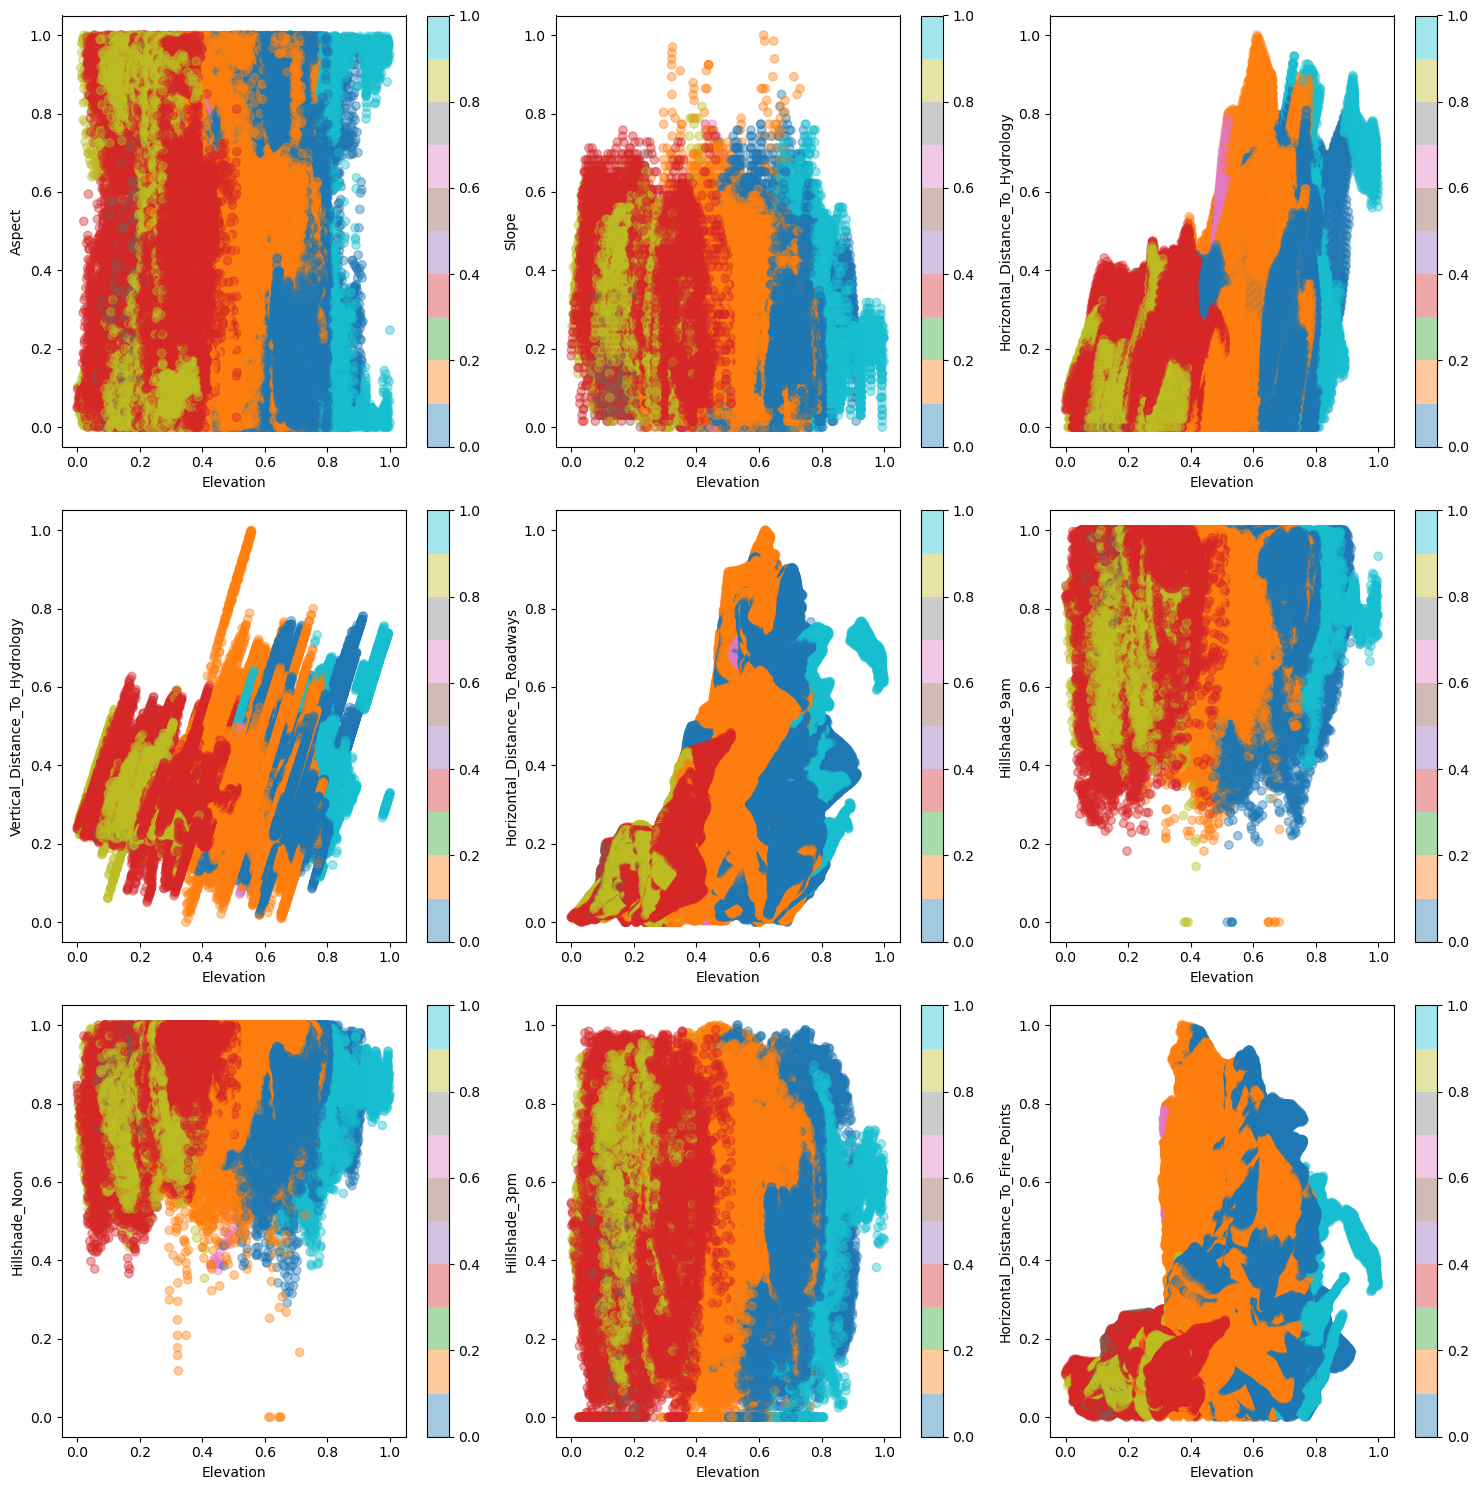

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

cmap = plt.get_cmap('tab10')

for i, col in enumerate(numeric_cols[1:]):
    scatter = axes[i].scatter(scaled_df[numeric_cols[0]], scaled_df[col], c=scaled_df['Cover_Type'], cmap=cmap, alpha=0.4)
    axes[i].set_xlabel(numeric_cols[0])
    axes[i].set_ylabel(col)
    fig.colorbar(scatter, ax=axes[i], orientation='vertical')

plt.tight_layout()
plt.show()

In [39]:
_, stratified_sample = train_test_split(df, test_size=0.01, stratify=df['Cover_Type'])

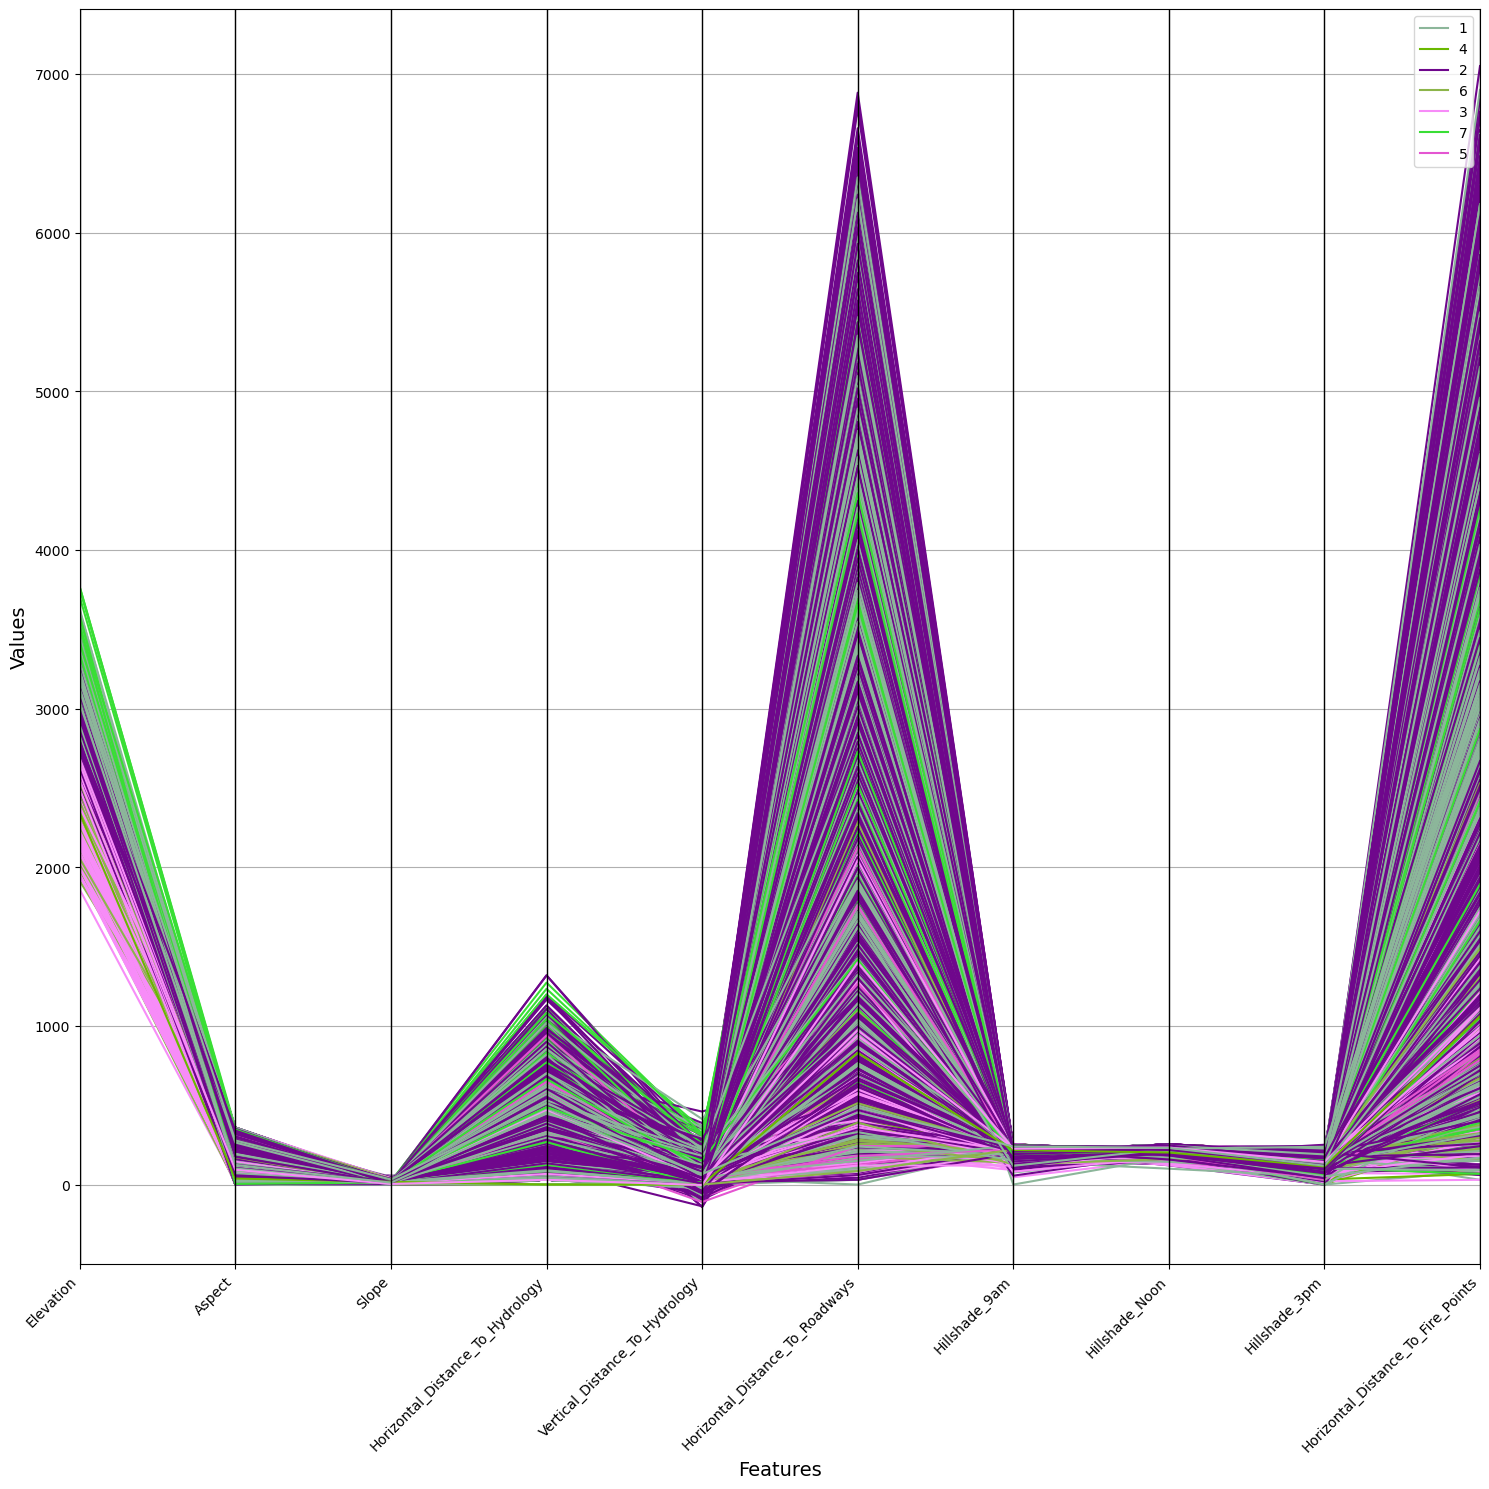

In [43]:
plt.figure(figsize=(15, 15))
parallel_coordinates(stratified_sample[numeric_t_cols], 'Cover_Type')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.tight_layout()
plt.show()

Checking the correlation between the variables

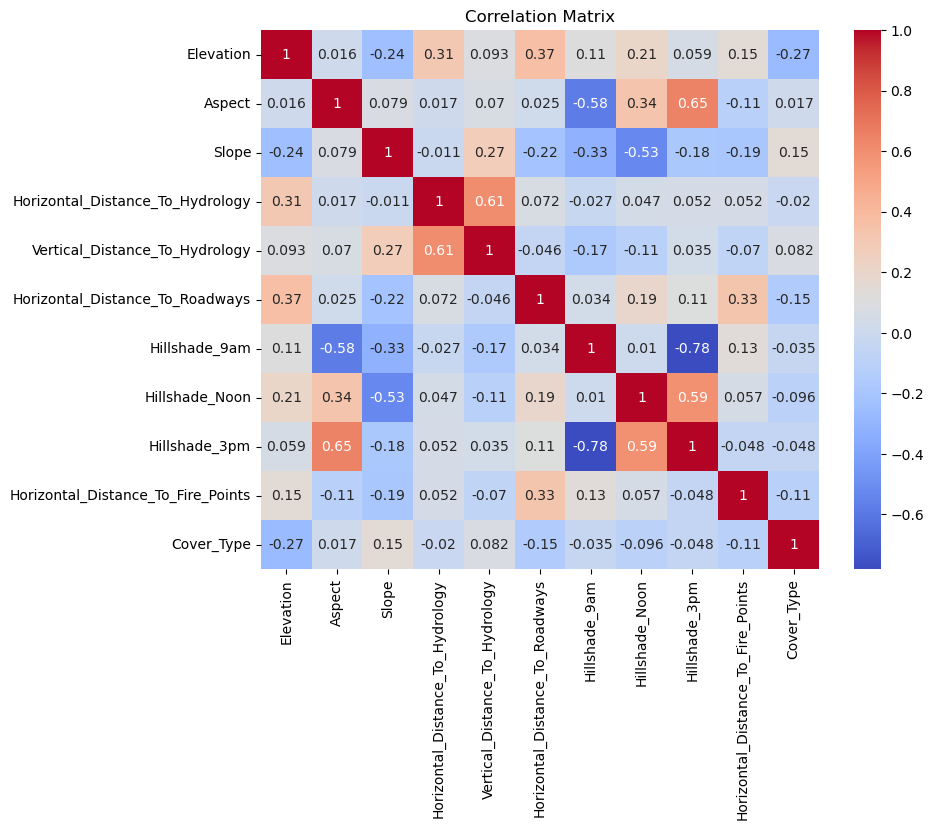

In [30]:
corr_matrix = df[numeric_t_cols].corr()
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

It seems that the features are not very strongly linearly correlated (with some exceptions, such as the hill shades at different times of the day, what actually makes sense), but they can have non-linear relations. Also, none of the features seems to have a significant linear relationship with the target feature. Using linear algorithms is probably not going to be very accurate in this dataset.

We can try to check the spearman rank correlation, for non-linear correlation.

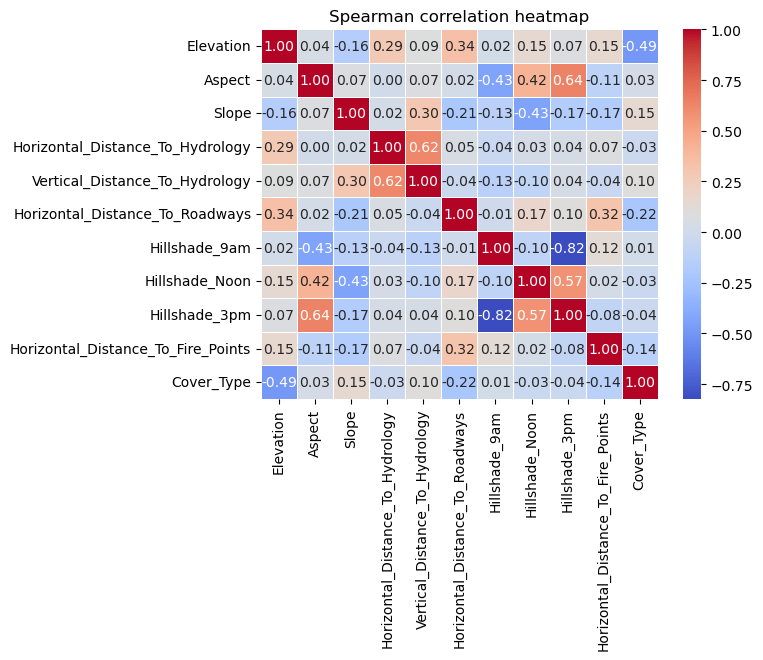

In [32]:
spearman_corr = df[numeric_t_cols].corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Spearman correlation heatmap")
plt.show()

Now we can see some other relationships. It seems that elevation and covertype have a negative correlation. Also, there's a strong correlation between the aspect and the hill shade at 3pm.

Let's see how the classes are distributed.

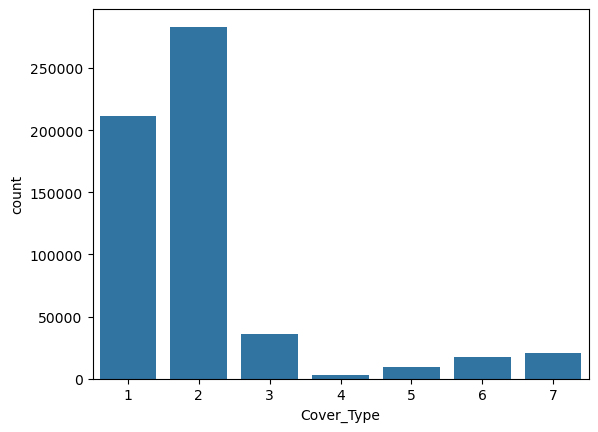

In [33]:
sns.countplot(data=df, x='Cover_Type')
plt.show()

The classes are heavily unbalanced. This may cause the algorithms to perform bad at the classes 3-7 for having considerably fewer instances than the classes 1 and 2. It may be necessary to work in balancing the classes.

In [34]:
todo_preprocessing.append("Classes are unbalanced.")

### Using Dimensionality Reduction Algorithms

#### Principal Component Analysis - PCA

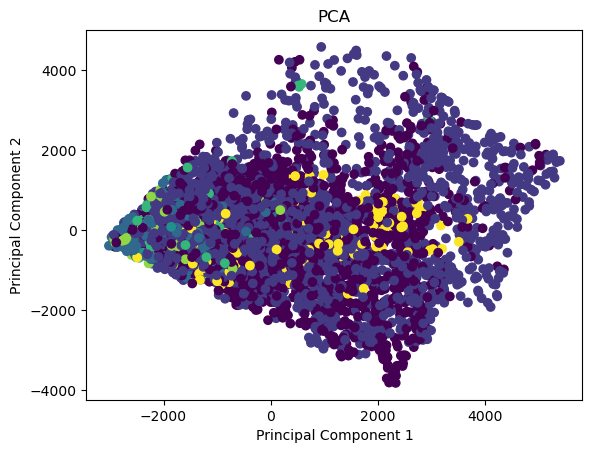

In [ ]:
# using 1% of the dataset (around 5k data points)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(stratified_sample.drop('Cover_Type', axis=1))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=stratified_sample['Cover_Type'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()

#### Uniform Manifold Approximation and Projection - UMAP